# Application of SVD for Collaborative Filtering Recommender Systems

Kylie Berg, Leslie Chang, and Anna Reis

## Abstract

In this report, we will discuss a real-world application of
singular-value decomposition to a collaborative filtering based movie
recommender system and evaluate its effectiveness.

## Introduction

As the amount of content available grows on video streaming platforms,
it becomes increasingly difficult for users to find movies that align
with their preferences. Netflix alone maintains over 6,000 different
titles constituting 36,000 hours of content, and its various
competitors are quickly catching up in size (Buchi 2023).
**Recommender systems,** which are applications that recommend
relevant videos to users based on their preferences and past viewing
history, are thus necessary for any individual to navigate a modern
streaming platform.

In this research project, we are developing a movie recommender system
using a **collaborative filtering technique, implemented by KNN, and
optimized by Singular Value Decomposition** (SVD). Collaborative
filtering in this context is when a user is recommended an item by
looking at the highly rated items of similar users (Schafer 2007). SVD
was first discovered by mathematicians Eugenio Beltrami and Camille
Jordan over 100 years ago, although it gained the majority of its
popularity and practical importance in the 1960s. Despite this age,
given the recent explosion of artificial intelligence and machine
learning technologies within the past decade and even the past year,
SVD continues to play an important role in modern industry and
research applications, such as our own movie recommender system (Dean
2022).

The rest of this paper is structured as:

1.  Methodology

    1.  KNN and Cosine Similarity

    2.  SVD

2.  Walkthrough of the Algorithm Using a Smaller Dataset

3.  Application of SVD to Entire Dataset

    1.  Evaluation of Effectiveness

4.  Takeaways and Conclusion

5.  References

## Methodology

### KNN and Cosine Similarity

For our purposes, we use the KNN algorithm to predict which rating a given user $x$ would give to a specific movie $y$ 
\cite{ts}. We do this by gathering the $k$ users with the most  similar ratings to user $x$ for all of the movies user $x$ has seen and then using these users’ average rating for the movie $y$ to predict what user $x$ would also rate this movie. 

We define “most similar” and “closest in distance” between the test users and training users utilizing cosine similarity. Cosine similarity measures the similarity between two vectors by taking the cosine of the angle between them. The cosine similarity ranges from -1 to 1, where a value of 1 indicates that  the two vectors are identical, a value of 0 indicates that the two vectors  are orthogonal (i.e., have no correlation), and a value of -1 indicates that  the two vectors are diametrically opposed (i.e., have a negative  correlation). In the case of the KNN algorithm, each training example is represented as a vector of feature values, and the cosine similarity between two examples is calculated as the dot product of their feature vectors divided by the product of their magnitudes. 

The choice of $k$ in the KNN algorithm  is an important hyperparameter, as it affects the bias-variance trade-off. A smaller value of $k$ will result in a more flexible and less biased model but with higher variance, while a larger value of $k$ will result in a more rigid and biased model, but with lower  variance. The optimal value of $k$ depends on the specific problem and dataset, and can be determined through cross-validation or other model  selection techniques. 


### SVD

SVD stands for Singular Value Decomposition. It is a factorization method  used in linear algebra to decompose a matrix into the product of three matrices, which can be useful for a variety of applications, including image processing, data compression, and data analysis \cite{ps}.
\newline
\newline
Given a matrix $X$ of size $mxn$, SVD factorizes $X$ as: 

$$X_{m \times n} = U_{m \times m}\Sigma_{m \times n}V_{n \times n}^T$$ 

where $U$ and $V$ are unitary matrices, so we have: 

$$UU^T = U^TU=I_m \text{  and  } VV^T = V^TV = I_n$$

\noindent The diagonal elements, $\sigma_i$, of $\Sigma$ are known as the singular values of $X$, and they represent the magnitude of the square root of eigenvalues of the symmetric positive semi-definite matrices  $X^TX$ or $XX^T$, whichever is smaller. The eigenvectors $X^TX$ and $XX^T$ are chosen so that the diagonal elements of $\Sigma$ are non negative and in descending order, i.e. $\sigma_1 \geq \sigma_2 \cdots \geq \sigma_r > 0$ Furthermore, $\sigma_i^2$ are the non-zero eigenvalues of $X^TX$ and $XX^T$. 

While python’s numpy library includes a function for calculating the components of SVD (numpy.linalg.svd()), we wrote our own function to decompose the matrix X into $U$, $\Sigma$, and $V$, in order to fully demonstrate the mathematical significance of each component. See Fig. 4 for code.

Since $U$ and $V$ are unitary matrices, they preserve lengths and angles. Therefore, all the rescaling is done by $\Sigma$. Meanwhile, because $\sigma_1 \geq \sigma_2 \cdots \geq \sigma_r > 0$  are in descending order from left top to right bottom, we can truncate the matrix $\Sigma$ from right bottom to left top corner, so we can preserve the most significant rescaling transformations of the matrix $X$. Mathematically, 

$$X = \sum_{k=1}^{r} (u_kv_k^T)\sigma_k$$

where each $u_kv_k^T$ is a rank-one matrix. 

It indicates that $X$ can be interpreted as the sum of rank-1 matrices with spectral norm $\sigma_i$ in descending order. Since the last terms contribute the least, we can use the truncated SVD as an approximation to the original matrix $X$. The truncation constitutes a lossy compression of the the information represented by $X$. 
If we retain $c < rank(X)$ values of $\Sigma$, it will reduce the size the size of $U$ and $V$ according to the following formula:

$$X_{m \times n}^\prime = U_{m \times c} \Sigma_{c \times c} V_{c \times n}^T$$

Here $X^\prime$ is the rank-c approximation of $X$. 

To demonstrate lossy compression using SVD truncation, we’ve included an example in the application of image compression. A gray-scale image can be represented by a matrix $M$ with entries of 0 to 255, and we can then apply SVD decomposition to $M$ to obtain

$$M = U \Sigma V^T$$

From there, we can truncate $\Sigma$ with different c values, and determine what rank needs to be retained to reconstruct $M$ with acceptable accuracy.

| 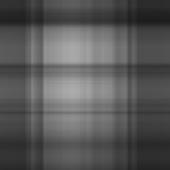 | 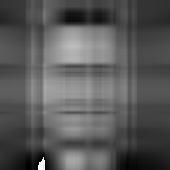 | 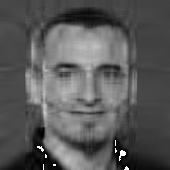 | 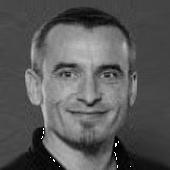 |
|-------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| rank1_40%                                                                           | rank2_47%                                                                           | rank10_69%                                                                          | rank26_83%                                                                          |

*Fig. 1. Resulting compressed image after truncating Sigma to varying
ranks.*

<img src="attachment:media/image4.jpg" style="width:1.77083in;height:1.77083in" />

*Fig. 2. Original image, full rank Sigma.*

The resolution is $600 \times 600$, the size of $M$ is $N_r \times N_c = 360,000$. From Fig. 1, we can see that the photo can be reconstructed with decent accuracy when we choose $rank(\Sigma) = 26$. Then, $\Sigma$ retain 83\% of the accuracy of the scaling while the size of the picture is decreased to $N_r \times N_{\Sigma} + N_{\Sigma} +N_{\Sigma} \times N_c  = 31,226,$ which is about 8.6\% of the original. 


## Walkthrough of the Algorithm Using a Smaller Dataset
For this portion, we will walk through a sample $10 \times 10$ matrix which contains users as rows and movies as columns, with each matrix entry $(i,j)$ representing the rating user $i$ gave movie $j$ to demonstrate how SVD and KNN work in tandem. It looks as follows within our code:

<img src="attachment:media/image73.png" style="width:3.02083in;height:2.76042in" />

*Fig. 3. Example 10x10 rating matrix, where entry (i,j) corresponds to
user i’s rating of movie j.*

Our first step, as mentioned in the prior, more theoretical sections, is to utilize SVD to compress this matrix to make it more easily parsed by KNN. Obviously, a $10 \times 10$ matrix does not actually have high computational complexity or consume many resources, but we will still perform SVD to demonstrate how the algorithm operates.

<img src="attachment:media/image44.png" style="width:6.56033in;height:3.76389in" />

*Fig. 4. SVD function used in place of np.linalg.svd( )*

First, SVD function (Fig. 4) computes $A^TA$. The square root of the eigenvalues of this resulting matrix known as the singular values, and will make up the diagonal of $\Sigma$. We sort the diagonal of $\Sigma$ in descending order so that the entry at (1,1) is the greatest singular value. The eigenvectors corresponding to these eigenvalues make up the $n \times n$ matrix $V$, and are transformed into orthonormal vectors using the gram-schmidt process. Next, as the columns of $U$ are uniquely determined by $V$, they are calculated by dividing $A$ matrix multiplied with the columns of the $V$, scaled by 1 over the singular value corresponding to the column of $V$:
$$U_i =  \frac{1}{\sigma_i}AV_i$$
After decomposing the $10 \times 10$ matrix by utilizing SVD, we may then feed it into KNN to perform prediction of the ratings of users in the test set. This occurs in a few main steps.
First, we compute the feature vectors for each training example and test example. In our code, this looks like formatting the matrices given to the main function in various ways: 

<img src="attachment:media/image70.png" style="width:4.91803in;height:1.19438in" />

*Fig. 5. Code snippet splitting example matrix into training and test
data*

Next, we calculate the cosine similarity between the test example and each training example. 

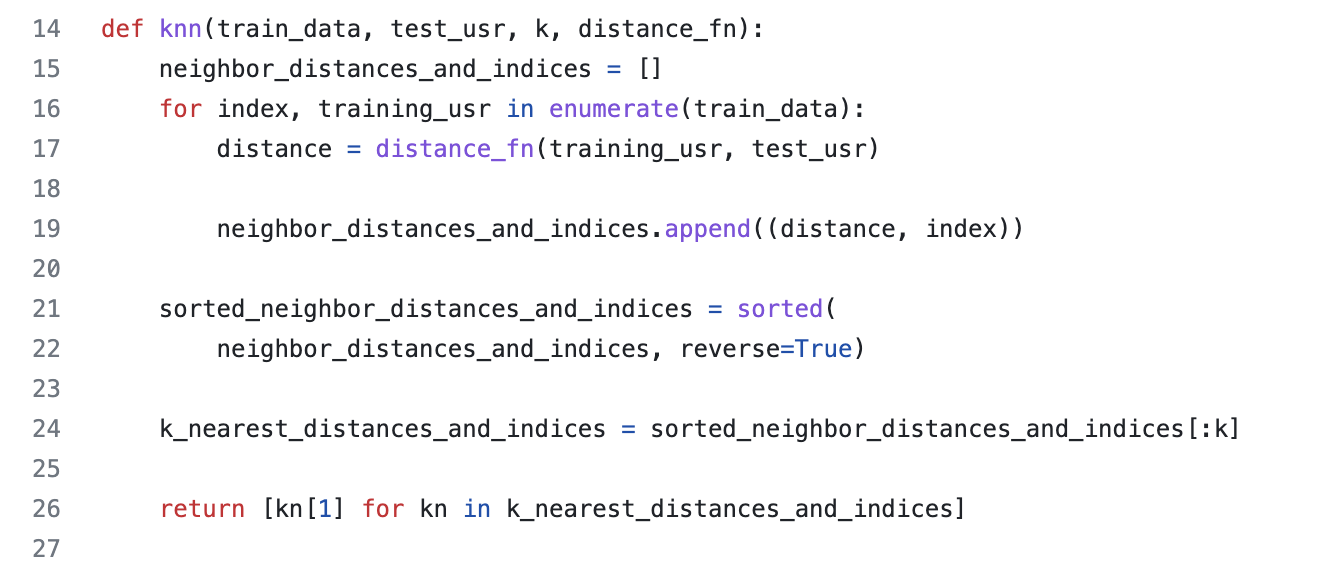*Fig.
6. KNN Code*

<img src="attachment:media/image59.png" style="width:6.56033in;height:0.93056in" />

*Fig. 7. Cosine Similarity code*

In our code, this looks like lines 15-19 in the KNN function in Figure 6. Line 15 creates a list to hold the cosine similarities of all training users in comparison to the test user. Line 16 iterates through every user in the training data, and distance in line 17 calls upon the cosine similarity function demonstrated in Figure 4 to calculate the cosine similarity of the test user with every training user. Line 19 takes each one of these cosine similarities and its corresponding index of the training user and adds it to the initial list. Line 21-22 then utilizes a built-in function to sort this list by the users with the highest cosine similarity. Line 24 then chops this list to include only the k most similar neighbors, depending on the k input into the function. Finally, line 26 returns the indices within the original matrix of the k closest neighbors.

<img src="attachment:media/image33.png" style="width:6.56033in;height:0.88889in" />

*Fig. 8. Code snippet reconstructing the matrix U and predicting test
user values*

The list of indices returned by the KNN function can then be directly used to predict the ratings of a test user. In line 55 of Figure 8, we transform the K-nearest users back to the original space from the truncated $U^\prime$ space. Line 58 of Figure 8 then predicts the rating of a given user by averaging index 0 of reconstruct, which is a matrix of the k-nearest neighbors truncated by a value c.

In summary, in this section, we compressed an original matrix via SVD and then parsed that matrix via KNN to find users similar to the given user in order to predict that user’s rating of a given movie.

## Application of SVD to Entire Dataset

Our original data set contained 610 users and their rankings of over 19,000 movies. The constructed rating matrix was incredibly sparse, and any computations involving this massive matrix crashed, so we chose to intelligently reduce the matrix. Any users who had rated less than 50 movies were removed, as well as any movies that had been rated less than 50 times, resulting in a smaller rating matrix of 378 users $\times$ 9724 movies. 
We then used the code described in the previous sections, SVD function and KNN function to obtain predictions for the test user’s rating of the movie set. 

Looping over the non-zero ratings of test users, we find the sum of the absolute value between the predication and the test user’s real ratings. This difference is the error of one test user. The total error for all users is the sum of the errors and divided by the number of test users.

When we process a matrix with the rank of 707, as in Figure 10, we can see the execution time decreases when reducing $c$ and $k$ values. ($c$ stands for the rank we preserve when truncating, and $k$ is the K value in the KNN algorithm) Therefore, the shortest time is 3.94 seconds when $k$ and $c$ both equal to 1, compared to 11.57 seconds when $k$ is 1 and $c$ is 700. The lowest deviation is obtained when $k$ equals 3 and $c$ equals 48. Surprisingly, it returns better results than when $k$ is 700. The higher rank value brings more noise, so the highest rank does not always lead to the best result. The higher $k$ value may include more irrelevant users in the training dataset, so higher $k$ values are not a positive correlation to better results.

## Discussion and Ways to Improve

Although we are proud of our work in this project, it is by no means perfect, and there are multiple important limitations of SVD and its related topics that merit discussion.
One limitation of our model is the use of collaborative filtering itself, as opposed to alternatives such as content-based filtering and hybrid filtering. Collaborative filtering in particular suffers from the cold-start problem, which refers to the difficulty of making accurate recommendations when only preliminary or small data sets are provided. In our application, this comes into play as not being able to generate reliable predictions for test users that only rate movies that were seen rarely or not at all in the training set. Collaborative filtering also faces scalability issues when processing large data sets, which we encountered in having to clean and reduce our original rating matrix after it was too large for our program. Content-based filtering, which generates recommendations based on the user’s history of rating certain features (in the case of movies: genre, director, etc), better handles the cold-start and scalability problems, but struggles in other areas like prediction novelty \cite{vd}. This is why almost all modern recommendation systems do not use strictly collaborative or content-based filtering, but instead utilize a hybrid system that combines the two and ultimately gives the best performance \cite{ba}. Our recommendation system would be most accurate and time efficient if we used hybrid filtering, as collaborative filtering is dated and faces many limitations. 

There are also well-documented drawbacks to the SVD decomposition. For example, the most basic version of SVD which we employ only relies on one data set, and there is no way to explicitly incorporate multiple data sets without creating more matrices or fundamentally changing SVD\cite{gl}.This limitation can lead to data that is less easily interpretable and also less accurate or all-encompassing. SVD also works best for linear relationships, but may prove inadequate in situations when this is not the case, i.e. non-linear relationships \cite{lp}. Of course, a relatively straightforward data set like our own fits well with SVD. However, if we were to scale to a larger data set or take on issues of higher complexity, a system like a neural network might be a more appropriate approach\cite{bw}. A neural network would also more adequately address the challenge of relying on only one data set because, in contrast to SVD, it can be trained on a variety of different inputs. 

On top of the more theoretical considerations, we also confronted challenges due to time and resources. The primary technical difficulty our team confronted during this project was running our program on the original, full-size data set of movie ratings, which contained 610 users and their ratings of over 19,000 movies.  To get our code to not crash and run in a reasonable amount of time, we had to draw on smaller, truncated data sets which reduced the accuracy and power of our recommendation system. One way to solve this problem would be to obtain stronger computers, but we were obviously limited in that respect to the power of our laptops, and did not have easy access to stronger computational power. We also realized that other coding frameworks, such as MatLab, might be quicker than our use of python and specifically NumPy, but unlike NumPy, one has to pay to access MatLab, which presents another barrier to access. A final way to solve this problem would be by running through our code line-by-line to optimize it as best as possible to reduce time complexity, but on a limited time frame, this ultimately was not possible.

## Conclusion

Overall, the completion of this project was illuminating on an important
topic within the spheres of linear algebra and machine learning. Through
this project, we were able to create a recommendation system similar to
those in use both in academia and industry applications. Altogether,
this proved to be a very rewarding and educational experience, and we
are grateful to Professor Dragomir and all the students in Math 2015 for
accompanying us in this learning journey.

## References

> Babak, J., & Khorshidi, S. (n.d.). *A REVIEW OF HYBRID RECOMMENDER
> SYSTEMS a*. Magnanimitas.Cz. Retrieved April 10, 2023, from
> [<u>http://www.magnanimitas.cz/ADALTA/0702/papers/I_khorshidi.pdf</u>](http://www.magnanimitas.cz/ADALTA/0702/papers/I_khorshidi.pdf)
>
> Buchi, C. (2023, February 27). *Netflix Review 2023*. Reviews.org.
> Retrieved April 17, 2023, from
> <https://www.reviews.org/tv-service/netflix-review/>.
>
> Dean, J. (2022, January 11). *Google Research: Themes from 2021 and
> Beyond*. Google Research. Retrieved April 20th, 2023 from
> <https://ai.googleblog.com/2022/01/google-research-themes-from-2021-and.html>.
>
> Dey, V. (2021, August 25). *Collaborative filtering vs content-based
> filtering for Recommender systems*. Analytics India Magazine.
> [<u>https://analyticsindiamag.com/collaborative-filtering-vs-content-based-filtering-for-recommender-systems/</u>](https://analyticsindiamag.com/collaborative-filtering-vs-content-based-filtering-for-recommender-systems/).
>
> Kumar, V. (2020, March 25). *Singular Value Decomposition (SVD) & Its
> Application In Recommender System*. Analytics India Magazine.
> [<u>https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/</u>](https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/)
>
> Lu, G. (2023, January 29). *How Long Would it Take to Watch Everything
> on Netflix?* Boss Hunting Magazine, retrieved April 18, 2023, from
> <https://www.bosshunting.com.au/entertainment/tv/how-long-watch-everything-on-netflix/#:~:text=Assuming%20no%20titles%20were%20added,roundtrips%20to%20the%20goddamn%20moon>
>
> Martin, C & Porter, M. (2012, December). *The Extraordinary SVD*. The
> Mathematical Association of America Monthly Issue, retrieved April 18,
> 2023, from
> [<u>https://people.maths.ox.ac.uk/porterm/papers/s4.pdf</u>](https://people.maths.ox.ac.uk/porterm/papers/s4.pdf).
>
> Papachristoudis, G. (2019, April 4). *Popular evaluation metrics in
> recommender systems explained*. Qloo.
> [<u>https://medium.com/qloo/popular-evaluation-metrics-in-recommender-systems-explained-324ff2fb427d</u>](https://medium.com/qloo/popular-evaluation-metrics-in-recommender-systems-explained-324ff2fb427d)
>
> Schafer, J. B., Frankowski, D., Herlocker, J., & Sen, S. (2007).
> Collaborative Filtering Recommender Systems. In *The Adaptive Web*
> (pp. 291–324). Springer Berlin Heidelberg.
>
> Srivastava, T. (2023, February 15). *A Complete Guide to K-Nearest
> Neighbors*. Analytics Vidhya, retrieved April 14th, 2023 from [<u>KNN
> Algorithm \| Latest Guide to K-Nearest Neighbors
> (analyticsvidhya.com)</u>](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)
>
> Symeonidis, P. (2017). *Matrix and Tensor Factorization Techniques for
> Recommender Systems.*